# Example 1: Linear Regression with California Housing Dataset

1. Load the California Housing dataset from scikit-learn using the load_boston() function. This dataset contains information about housing prices in the California area and various features of the houses such as crime rate, number of rooms, and distance to employment centers.

In [1]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load the California housing dataset
california = fetch_california_housing()

In [2]:
california

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

2. Split the data into training and testing sets using the train_test_split() function from scikit-learn. Use 80% of the data for training and 20% for testing.

3. Train a linear regression model using the training data. You can use the LinearRegression class from scikit-learn to train the model.

4. Evaluate the performance of the model on the testing data using the mean squared error (MSE) and R-squared (R2) score. You can use the mean_squared_error() and r2_score() functions from scikit-learn to calculate these metrics.

5. Visualize the performance of the model by plotting the predicted prices against the actual prices on a scatter plot. You can use the scatter() function from Matplotlib to create the scatter plot.

In [15]:
print(len(california.data[:,0]))
print(len(california.target))

20640
20640


In [20]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(california.data[:,0].reshape(-1, 1), california.target, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the performance of the model using mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean squared error: {mse:.2f}")

Mean squared error: 0.71


In [23]:
y_train

array([1.03 , 3.821, 1.726, ..., 2.221, 2.835, 3.25 ])

In [20]:
len(california.data[:,0])

20640

In [21]:
len(california.target)

20640

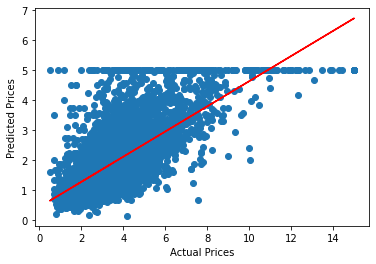

In [7]:
import matplotlib.pyplot as plt
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred,'r')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.show()

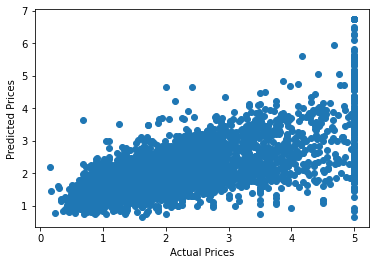

In [8]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.show()


# Example 2:

In [3]:
import pandas as pd
import numpy as np

X = pd.DataFrame({'x': [300, 170, 288, 360, 319, 330, 520, 345, 399, 479]})
y = pd.DataFrame({'y': [305000, 270000, 360000, 370000, 379000, 405000, 407500, 450000, 450000, 485000]})
X_seq = np.linspace(min(X['x']), max(X['x']), 300).reshape(-1, 1)

In [4]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
degree=9
polyreg=make_pipeline(PolynomialFeatures(degree),LinearRegression())
polyreg.fit(X,y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=9)),
                ('linearregression', LinearRegression())])

/opt/conda/lib/python3.9/site-packages/sklearn/base.py:445: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


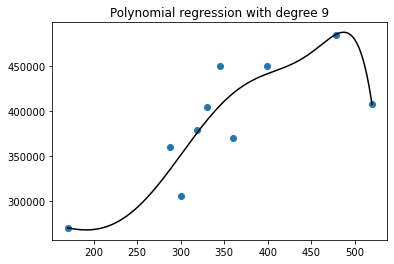

In [5]:
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(X,y)
plt.plot(X_seq,polyreg.predict(X_seq),color="black")
plt.title("Polynomial regression with degree "+str(degree))
plt.show()